In [1]:
import numpy as np
import pandas as pd

#import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#для более четкого отображения графиков, векторный формат
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

#параметры графика
#from pylab import rcParams
#plt.style.use('ggplot')

import seaborn as sns; sns.set()


In [2]:
# Пути к директориям и файлам
path_name_test = "test_tut_reg.csv"
path_name_train = "train_tut_reg.csv"

# Загружаем данные в датафреймы
df_test = pd.read_csv(path_name_test)
df = pd.read_csv(path_name_train)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [4]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [6]:
# X = df.drop('mean_exam_points', 1)
# y = df['mean_exam_points']

In [7]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

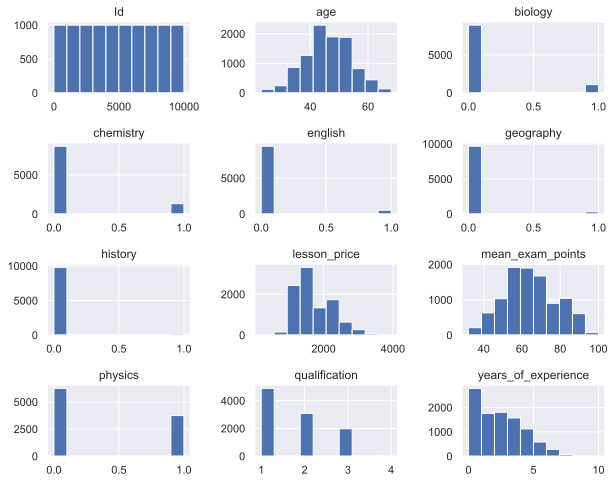

In [8]:
# Построим гистограммы параметров
df.hist(bins=10, figsize=(10,8))
plt.subplots_adjust(wspace=0.45,hspace=0.7)
plt.show()

In [9]:
# Расчитаем корреляционную матрицу
corr_matrix = df.corr()
# Смотрим значения коэффициентов корреляции 
corr_matrix["mean_exam_points"].sort_values(ascending=False)

mean_exam_points       1.000000
qualification          0.755963
lesson_price           0.721179
years_of_experience    0.205417
physics                0.187726
biology                0.023022
chemistry              0.017825
geography              0.014401
english                0.013174
Id                     0.004121
history               -0.000113
age                   -0.007646
Name: mean_exam_points, dtype: float64

In [10]:
def highlight_corr(val):
    """ Подсветка корреляционной матрицы    
    """
    if ((val > -0.999 and val < -0.8) or (val < 0.999 and val > 0.8)):
        color = 'DodgerBlue'
    elif ((val >= -0.8 and val < -0.6) or (val <= 0.8 and val > 0.6)):
        color = 'DeepSkyBlue'
    elif ((val >= -0.6 and val < -0.4) or (val <= 0.6 and val > 0.4)):
        color = 'LightSkyBlue'
    elif ((val >= -0.4 and val < -0.2) or (val <= 0.4 and val > 0.2)):
        color = 'Yellow'
    elif ((val >= -0.2 and val < -0.09) or (val <= 0.2 and val > 0.09)):
        color = 'Yellow'        
    elif (val == 1):
        color = 'Green'
    else:
        color = 'LightGreen'
    return f'background-color:{color}'

In [12]:
df["years_exp"] = df["years_of_experience"]/df["age"]
df_test["years_exp"] = df_test["years_of_experience"]/df_test["age"]
df["mean_lp"] = df["geography"]+df["biology"]+df["chemistry"]+df["english"]+df["history"]
df_test["mean_lp"] = df_test["geography"]+df_test["biology"]+df_test["chemistry"]+df_test["english"]+df_test["history"]

In [13]:
# Построим корреляционную матрицу, для выявления слабо связанных с признаком факторов

corr_pd = df.corr()
display(corr_pd.style.set_caption('Корреляционная матрица').applymap(highlight_corr))

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,years_exp,mean_lp
Id,1.000000,-0.004596,0.007408,-0.004433,-0.005077,-0.010570,0.002694,-0.000016,0.017723,-0.014869,-0.004482,0.004121,0.006617,0.002966
age,-0.004596,1.000000,0.059947,-0.005462,-0.000976,0.004045,0.001250,-0.005026,-0.012546,0.013130,0.010606,-0.007646,-0.146428,-0.000350
years_of_experience,0.007408,0.059947,1.000000,0.248311,0.194097,0.008451,0.004246,-0.001722,-0.010241,-0.011129,0.018640,0.205417,0.959102,-0.001417
lesson_price,-0.004433,-0.005462,0.248311,1.000000,0.790087,-0.006432,0.005130,-0.004860,-0.012018,0.010525,-0.001142,0.721179,0.227989,-0.001404
qualification,-0.005077,-0.000976,0.194097,0.790087,1.000000,0.007529,-0.002683,-0.007504,-0.008047,0.003610,-0.005109,0.755963,0.178709,-0.009148
physics,-0.010570,0.004045,0.008451,-0.006432,0.007529,1.000000,0.019852,0.000661,0.004238,0.001904,0.004867,0.187726,0.009874,0.015861
chemistry,0.002694,0.001250,0.004246,0.005130,-0.002683,0.019852,1.000000,0.007866,0.009974,-0.004447,-0.008079,0.017825,0.003360,0.609453
biology,-0.000016,-0.005026,-0.001722,-0.004860,-0.007504,0.000661,0.007866,1.000000,0.010146,-0.013042,0.010995,0.023022,0.001211,0.563676
english,0.017723,-0.012546,-0.010241,-0.012018,-0.008047,0.004238,0.009974,0.010146,1.000000,-0.008148,-0.004560,0.013174,-0.004003,0.409386
geography,-0.014869,0.013130,-0.011129,0.010525,0.003610,0.001904,-0.004447,-0.013042,-0.008148,1.000000,-0.005049,0.014401,-0.013861,0.299405


In [14]:
# df["mean_three"] = df["physics"]+df["biology"]+df["chemistry"]
# df_test["qualification_per_lp"] = df_test["qualification"]/df_test["lesson_price"]

In [15]:
# Расчитаем корреляционную матрицу
corr_matrix = df.corr()
# Смотрим значения коэффициентов корреляции 
corr_matrix["mean_exam_points"].sort_values(ascending=False)

mean_exam_points       1.000000
qualification          0.755963
lesson_price           0.721179
years_of_experience    0.205417
years_exp              0.191137
physics                0.187726
mean_lp                0.033360
biology                0.023022
chemistry              0.017825
geography              0.014401
english                0.013174
Id                     0.004121
history               -0.000113
age                   -0.007646
Name: mean_exam_points, dtype: float64

In [16]:
NUM_FEATURE_NAMES = ["qualification", "lesson_price",
                     "years_of_experience","years_exp","physics","mean_lp"]
#"lesson_price",
                     #"biology", "chemistry"] #"geography", "english", "age" ]           

In [17]:
from sklearn.preprocessing import StandardScaler

#Нормализация данных
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

In [18]:
#Нормализация данных
scaler_test = StandardScaler()

df_norm_test = df_test.copy()
df_norm_test[NUM_FEATURE_NAMES] = scaler_test.fit_transform(df_norm_test[NUM_FEATURE_NAMES])

df_test = df_norm_test.copy()

In [19]:
TARGET_NAME = 'mean_exam_points'

In [20]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
# Разбиение на train и test
X = df[NUM_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

#создаем объект GradientBoostingRegressor
final_model = GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=42)

#обучаем модель
final_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
y_test_pred = final_model.predict(df[NUM_FEATURE_NAMES])
y_test_pred_test = final_model.predict(df_test[NUM_FEATURE_NAMES])

In [23]:
score_test = final_model.score(X_test,y_test)
score_test

0.7687605257484368

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import catboost as catb
# CatBoost
model_catb = catb.CatBoostRegressor(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

#get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [25]:
model_catb = catb.CatBoostRegressor(silent=True, random_state=21)

In [26]:
params = {'n_estimators':[50, 100, 300, 600, 1000,1200, 1300, 1500],
          'max_depth':[3, 5, 8,7, 9,10],
         "l2_leaf_reg":[10,15,45]}

In [27]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [28]:
%%time

rs = RandomizedSearchCV(model_catb, params, cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 23.5 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   error_score=nan,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002693D911188>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'l2_leaf_reg': [10, 15, 45],
                                        'max_depth': [3, 5, 8, 7, 9, 10],
                                        'n_estimators': [50, 100, 300, 600,
                                                         1000, 1200, 1300,
                                                         1500]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [29]:
rs.best_params_

{'n_estimators': 600, 'max_depth': 7, 'l2_leaf_reg': 15}

In [30]:
rs.best_score_

0.7830394660939644

In [31]:
%%time

final_model = catb.CatBoostRegressor(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                     l2_leaf_reg=rs.best_params_["l2_leaf_reg"],
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

Wall time: 2.02 s


In [32]:

y_test_pred_test_ct = final_model.predict(df_test[NUM_FEATURE_NAMES])

In [33]:
score_test = final_model.score(X_test,y_test)
score_test

0.783006981314321

In [34]:
#генерируем порядковые номера
id_df = [i for i in range(10000,20000)]

#создаем датафрейм для записи в результирующий файл
df_csv = pd.DataFrame({'Id': id_df,'mean_exam_points': y_test_pred_test_ct})

#записываем модельные данные файл
df_csv.to_csv(r"VYPolishchuk_predictions_kaggle_reg.csv", index=False, encoding='utf-8')